# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API key from api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Get current time
now = datetime.datetime.now()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Dependencies
import openweathermapy.core as owm

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

In [4]:
# defined a function to be used later in getting the needed information from the API
def get_weather(city):
    return owm.get_current(city, **settings)

In [5]:
#Collect the necessary city weather data
#Create an empty list to append the city weather info to
city_weather = []

# loop to itterate though cities list, preform an API call and append to a list
for city in cities:
    try:
        current_weather = get_weather(city)
        city_weather.append(current_weather)
    except Exception as e:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Extract data from city_weather list and append to a specific list
#Empty Data Lists
city_name = []
country = []
latitude = []
longitude = []
cloudiness = []
date = []
humidity = []
max_temp = []
wind_speed = []

#Loop through city_weather, extract data, and append to list
for city in city_weather:
    city_name.append(city.get("name"))
    country.append(city.get("sys").get("country"))
    latitude.append(city.get("coord").get("lat"))
    longitude.append(city.get("coord").get("lon"))
    cloudiness.append(city.get("clouds").get("all"))
    date.append(city.get("dt"))
    humidity.append(city.get("main").get("humidity"))
    max_temp.append(city.get("main").get("temp_max"))
    wind_speed.append(city.get("wind").get("speed"))


In [7]:
# print(city_name)
# print(country)
# print(latitude)
# print(longitude)
# print(cloudiness)
# print(date)
print(humidity)
# print(max_temp)
# print(wind_speed)

[53, 74, 91, 60, 22, 56, 59, 60, 87, 70, 37, 82, 47, 83, 86, 43, 50, 54, 70, 88, 50, 100, 56, 92, 82, 66, 66, 93, 98, 53, 89, 100, 93, 66, 49, 44, 100, 60, 91, 68, 100, 100, 87, 68, 100, 98, 38, 93, 95, 45, 100, 78, 49, 57, 89, 100, 88, 66, 100, 75, 86, 94, 92, 72, 82, 98, 86, 43, 87, 100, 72, 74, 84, 84, 47, 100, 94, 45, 94, 96, 88, 87, 100, 44, 60, 86, 100, 59, 83, 62, 91, 100, 85, 81, 83, 70, 92, 92, 30, 88, 74, 62, 48, 64, 88, 88, 35, 87, 37, 93, 100, 100, 50, 78, 38, 86, 52, 100, 70, 61, 79, 98, 86, 69, 86, 94, 82, 100, 86, 96, 80, 71, 78, 92, 58, 88, 66, 65, 78, 81, 87, 62, 93, 8, 25, 56, 77, 35, 69, 93, 73, 57, 83, 89, 81, 78, 71, 88, 69, 78, 100, 60, 66, 93, 46, 78, 75, 78, 100, 84, 77, 29, 59, 24, 63, 48, 64, 45, 77, 28, 83, 97, 100, 94, 50, 74, 78, 93, 85, 81, 78, 86, 56, 95, 70, 48, 78, 78, 85, 81, 100, 83, 73, 88, 21, 69, 99, 65, 83, 56, 93, 79, 88, 20, 95, 76, 73, 81, 59, 73, 87, 33, 64, 87, 51, 290, 78, 14, 76, 96, 59, 52, 85, 68, 58, 83, 80, 57, 63, 100, 97, 94, 77, 99, 

In [8]:
# Build Dataframe
# Dictionary to build dataframe
city_data = {"City": city_name,
        "Country": country,
        "Latitude": latitude,
        "Longitude": longitude,
        "Cloudiness": cloudiness,
        "Date": date,
        "Humidity": humidity,
        "Max Temp": max_temp,
        "Wind Speed": wind_speed}
# create dataframe
city_weather_df = pd.DataFrame(data=city_data)
city_weather_df.head()

,City,Country,Latitude,Longitude,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,Kapaa,US,22.08,-159.32,90,1551737304,53,73.40,17.22
1,Puerto Ayora,EC,-0.74,-90.35,75,1551736800,74,82.40,11.41
2,Punta Arenas,CL,-53.16,-70.91,40,1551737612,91,50.00,26.40
3,Chokurdakh,RU,70.62,147.90,48,1551737961,60,-20.76,3.15
4,Okahandja,NA,-21.98,16.91,76,1551736827,22,80.60,3.36


In [9]:
#Output data to a CSV
city_weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [27]:
def plotvslatitude(inputlist):
    
    if inputlist == "Max Temp":
        ylabeltxt = "Max Temperature (F)"
        titlesub = "Max Temperature"
        filenamesub = "MaxTemperature"
    elif inputlist == "Humidity":
        titlesub = inputlist
        ylabeltxt = "Humidity (%)"
        plt.ylim(0,105,1)
        filenamesub = "Humidity"
    elif inputlist == "Cloudiness":
        titlesub = inputlist
        ylabeltxt = "Cloudiness (%)"
        filenamesub = "Cloudiness"
    elif inputlist == "Wind Speed":
        titlesub = inputlist
        ylabeltxt = "Wind Speed (mph)"
        filenamesub = "WindSpeed"
    
    # Build a scatter plot for each data type
    plt.scatter(city_weather_df["Latitude"], 
                city_weather_df[inputlist], 
                marker="o", 
                edgecolors="black", 
                facecolors="navy", 
                alpha = .6)

    # Incorporate the other graph properties
    todaydate = now.strftime("%m/%d/%Y")
    plt.title("City Latitude vs " + titlesub + " (" + todaydate + ")")
    plt.ylabel(ylabeltxt)
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save the figure
    plt.savefig("output_data/Latitude_By_" + filenamesub + "_Scatter_Plot_World_Cities.png")

    # Show plot
    plt.show()

#### Latitude vs. Temperature Plot

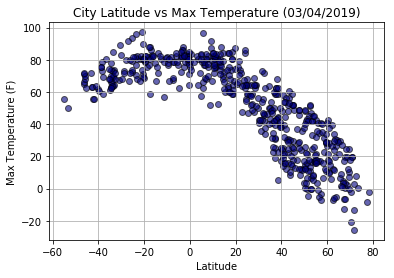

In [28]:
#use function to plot latitude vs. max temp
plotvslatitude("Max Temp")

#### Latitude vs. Humidity Plot

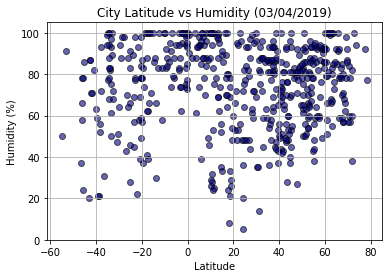

In [29]:
#use function to plot latitude vs. humidity
plotvslatitude("Humidity")

#### Latitude vs. Cloudiness Plot

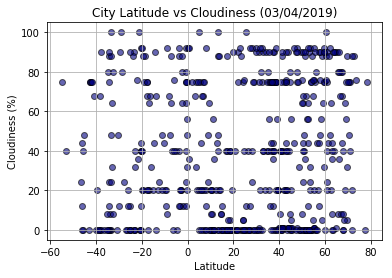

In [30]:
#use function to plot latitude vs. cloudiness
plotvslatitude("Cloudiness")

#### Latitude vs. Wind Speed Plot

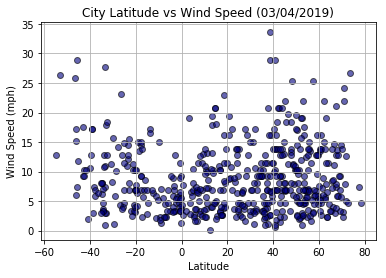

In [31]:
#use function to plot latitude vs. Wind Speed
plotvslatitude("Wind Speed")